In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

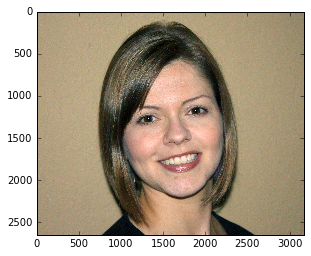

In [2]:
img = cv2.imread('profile_photo.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

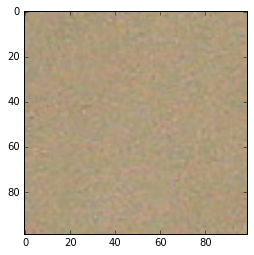

In [3]:
roi = img[1:100,1:100,:]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [5]:
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

In [6]:
#target = cv2.imread('rose.png')
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
roihist = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )



186.0


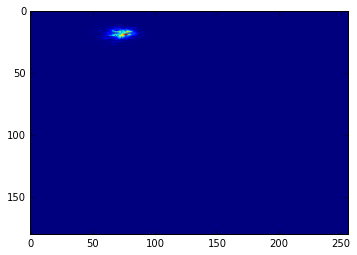

In [7]:
plt.imshow(roihist)
print roihist.max()

In [8]:
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
print(roihist.max())

255.0


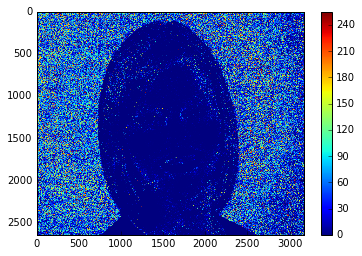

In [9]:
dst = cv2.calcBackProject([hsv_img],[0,1],roihist,[0,180,0,256],1)
plt.imshow(dst)
plt.colorbar()

(77, 19)


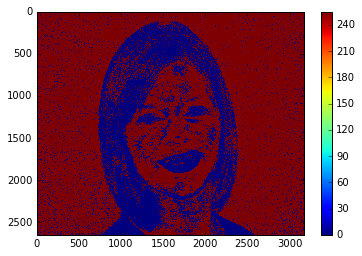

In [70]:
hist_peak_loc = cv2.minMaxLoc(roihist)[3]
print hist_peak_loc
toll = 15;
lower = np.array([max(0,hist_peak_loc[1] - toll) , max(0,hist_peak_loc[0] - toll) , 0])
upper = np.array([min(180,hist_peak_loc[1] + toll) , min(255,hist_peak_loc[0] + toll) , 255])
dst2 = cv2.inRange(hsv_img,lower,upper);
plt.imshow(dst2);plt.colorbar()

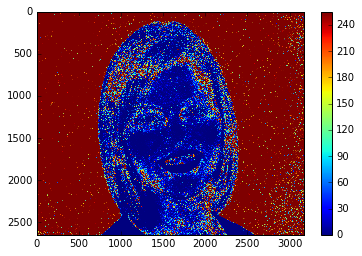

In [10]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
plt.imshow(dst)
plt.colorbar()

In [11]:
ret,thresh = cv2.threshold(dst,0,255,cv2.THRESH_OTSU)
thresh = 255-thresh

In [17]:
ret

134.0

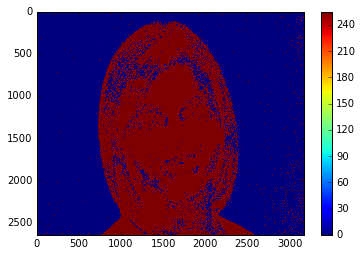

In [12]:
plt.imshow(thresh)
plt.colorbar()

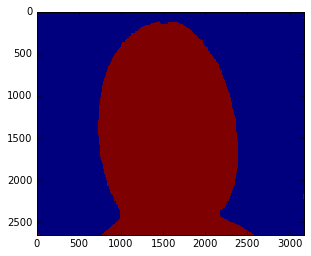

In [13]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_ERODE,kernel, iterations = 2)
kernel = np.ones((15,15),np.uint8)
opening = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 5)
plt.imshow(opening)

In [14]:
thresh = opening
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(img,thresh)

#res = np.vstack((target,thresh,res))
#cv2.imwrite('res.jpg',res)
#


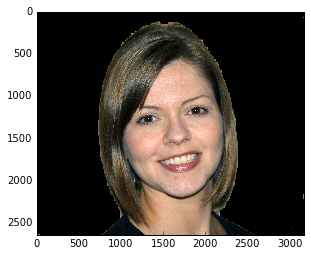

In [15]:
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))